In [ ]:
!pip install mendelai-brat-parser
!pip install stc

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('universal_tagset')

  Created wheel for mendelai-brat-parser: filename=mendelai_brat_parser-0.0.11-py3-none-any.whl size=4945 sha256=28584ead3eaa4d1a72473ab13b588ce033adef85cae5cd41420e39e20b1d260d
  Stored in directory: /root/.cache/pip/wheels/7e/40/73/4f68f4fa597be33e250400cd56c28c85862b1cba5b3c7c33f1
Successfully built mendelai-brat-parser
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import regex as re
from collections import Counter
import math

from google.colab import files
import zipfile
import glob

from brat_parser import get_entities_relations_attributes_groups

from nltk.tag import pos_tag, map_tag

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from brat_parser import get_entities_relations_attributes_groups

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from stc import SparseTensorClassifier
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
# Neural network imports.
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Dropout
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model, Input

In [ ]:
# Import the statistics and positions information of the sentences to classify.
print('\nImport sentence_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport sentence_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport sentence_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport sentence_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport sentence_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport essay_BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport remaining_stat.csv\n')
upload = files.upload()


Import sentence_statistic.csv




Import sentence_POS.csv




Import sentence_simple_POS.csv




Import sentence_dependency.csv




Import sentence_dependency_tree_stat.csv




Import sentence_named_entity_BOW.csv




Import essay_BOW_appendix_words.csv




Import remaining_stat.csv



In [ ]:
# Import the Stab and Gurevych dataset for Argumentation Mining (2017 version).

uploaded = files.upload()

Saving ArgumentAnnotatedEssays-2.0.zip to ArgumentAnnotatedEssays-2.0.zip


In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)


In [ ]:
# Extract zip file (two zip files one inside the other).

extract_zip('ArgumentAnnotatedEssays-2.0.zip','ArgumentAnnotatedEssays-2.0')

extract_zip('ArgumentAnnotatedEssays-2.0/ArgumentAnnotatedEssays-2.0/brat-project-final.zip','ArgumentAnnotatedEssays')

# **Create the ann Dataframe**

In [ ]:
# Extract the list of text files of the essays in the dataset.
txt_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.txt"))

# Extract the list of text files of the essays in the dataset.
ann_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.ann"))

In [ ]:
# List of text files of the essays.
txt_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.txt']

In [ ]:
# List of the annotated files of the essays.
ann_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.ann']

In [ ]:
# Transfor the ann files into four dictionaries
ann_disctionaries=[get_entities_relations_attributes_groups(file) for file in ann_files]

# Transform the first dictionary (entities) obtained from each ann file into a dataset
essay_ann_datasets = [pd.DataFrame.from_dict(entities, orient='index') for entities,_,_,_ in ann_disctionaries]

# Add a coloumn into the dataset that identifies the document
for i in range(len(essay_ann_datasets)):
  essay_ann_datasets[i].insert(0,'doc_id',i)

# Create a common dataset
Essay_ann_dataset = pd.concat(essay_ann_datasets)

In [ ]:
# Sobstitue the values in the "span" feature (substitute each tuple with its first inner tuple)
for i in range(len(Essay_ann_dataset.index)):
  Essay_ann_dataset['span'][i]=Essay_ann_dataset['span'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Essay_ann_dataset.head()

,doc_id,id,type,span,text
T1,0,T1,MajorClaim,"(503, 575)",we should attach more importance to cooperatio...
T2,0,T2,MajorClaim,"(2154, 2231)",a more cooperative attitudes towards life is m...
T3,0,T3,Claim,"(591, 714)","through cooperation, children can learn about ..."
T4,0,T4,Premise,"(716, 851)",What we acquired from team work is not only ho...
T5,0,T5,Premise,"(853, 1086)","During the process of cooperation, children ca..."


# **IOB and word list**

In [ ]:
# List of texts of the essays
files_text=[open(file).read() for file in txt_files]

In [ ]:
# Check the presence of the character | (information used later).
for essay in files_text:
  if not (essay.find("|") == -1):
      print("One found!")

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "span" coloumn of the Dataframe of the annotation.

sorted_span=[sorted(list(Essay_ann_dataset.loc[Essay_ann_dataset['doc_id'] == i,['span','type']].values), key=lambda element: (element[0][0]) ) for i in range(len(ann_files))]

In [ ]:
sorted_span[0]

[array([(503, 575), 'MajorClaim'], dtype=object),
 array([(591, 714), 'Claim'], dtype=object),
 array([(716, 851), 'Premise'], dtype=object),
 array([(853, 1086), 'Premise'], dtype=object),
 array([(1088, 1191), 'Premise'], dtype=object),
 array([(1212, 1301), 'Premise'], dtype=object),
 array([(1332, 1376), 'Claim'], dtype=object),
 array([(1387, 1492), 'Premise'], dtype=object),
 array([(1549, 1846), 'Premise'], dtype=object),
 array([(1927, 1992), 'Claim'], dtype=object),
 array([(2154, 2231), 'MajorClaim'], dtype=object)]

In [ ]:
# Tranform the couples of points ((start,end) of each section) to a list (separator of different section).

span_points=[]

for i in range(len(sorted_span)):
  list_points=[sep for sub in sorted_span[i] for sep in sub[0]]
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(files_text[i]))
  span_points.append(list_points)

In [ ]:
span_points[0]

[0,
 503,
 575,
 591,
 714,
 716,
 851,
 853,
 1086,
 1088,
 1191,
 1212,
 1301,
 1332,
 1376,
 1387,
 1492,
 1549,
 1846,
 1927,
 1992,
 2154,
 2231,
 2232]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(files_text)):
  split_text.append([files_text[z][i: j] for i, j in zip(span_points[z], span_points[z][1:])])

In [ ]:
split_text[0][0:10]

["Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that ",
 'we should attach more importance to cooperation during primary education',
 '.\nFirst of all, ',
 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
 '. ',
 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
 '. ',
 'During the process of cooperation, children can learn about how to listen to opinions of others, how to com

In [ ]:
# Get the list of the words of each essay and the corresponding labels 
# ( argumentative section, premise or claim indicated through IOB).

Y_IOB=[]
X_essay_word_list=[]

for i in range(len(split_text)):
  
  IOB=[]
  essay_word_list=[]

  # next_type is the next position still not considered in the list of argumentative sections of the essay examined.
  next_type=0

  # Remove title from essay considered (splitted_text)
  no_title=[re.sub(r".*\n\n","",text) for text in split_text[i]]

  # Set boolean value next_token_is_argumentative to false.
  # (first section of each essay is never argumentative, it's the one containing the title).
  next_token_is_argumentative=False

  for section in no_title:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    essay_word_list+=seq

    if next_token_is_argumentative:
      IOB+=['B']
      for token in range(len(seq)-1):
        IOB+=['I']  
    else:
      for token in range(len(seq)):
        IOB+=['O']

    # An argumentative section is followed by a non-argumentative section and vice-versa    
    next_token_is_argumentative=not next_token_is_argumentative

  Y_IOB.append(IOB)
  X_essay_word_list.append(essay_word_list)

In [ ]:
for i in range(80,120):
  print(X_essay_word_list[0][i]+" - "+Y_IOB[0][i])

i - O
firmly - O
believe - O
that - O
we - B
should - I
attach - I
more - I
importance - I
to - I
cooperation - I
during - I
primary - I
education - I
. - O
first - O
of - O
all - O
, - O
through - B
cooperation - I
, - I
children - I
can - I
learn - I
about - I
interpersonal - I
skills - I
which - I
are - I
significant - I
in - I
the - I
future - I
life - I
of - I
all - I
students - I
. - O
what - B


# **Find out sentences which contain argumentative section**

In [ ]:
sentence_list=[]

# Sentence associated to each word contained in the corpus.
# (to each word in a position is associated a sentence in the sentence list).
sentence_of_word=[]
sentence_length=[]
sentence_document_id=[]
num_total_sentences=0
current_document_id=0

for essay_id in range(len(X_essay_word_list)):
  sentence=""
  sentence_words_essay=[]
  sentence_count_words=0

  for word_id in range(len(X_essay_word_list[essay_id])):
    
    word=X_essay_word_list[essay_id][word_id]

    if not ( word=="." ):
      sentence+=word+" "
    sentence_words_essay.append(num_total_sentences)
    sentence_count_words+=1
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      sentence_list.append(sentence)
      sentence_length.append(sentence_count_words)
      sentence_document_id.append(current_document_id)
            
      sentence=""
      num_total_sentences+=1
      sentence_count_words=0

  # Check that the last sentence of the essay has been recognised as such.
  if not sentence=="":
    sentence_list.append(sentence)
    sentence_length.append(sentence_count_words)
    sentence_document_id.append(current_document_id)
            
    sentence=""
    num_total_sentences+=1
    sentence_count_words=0    

  # Once the essay is over update the list of the sentences containing each word. 
  sentence_of_word.append(sentence_words_essay)
  current_document_id+=1

# **Dependencies**

In [ ]:
# Load the spacy engine:
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Return the list of dependencies for each sentence in the list passed in input
# and the maximum number of child and max depth of the ROOT(s) contained in the sentence.

def dependencies_list(sentences_list: list)->list:
  
  sentence_dependency_list=[]

  for sentences_doc in sentences_list:
    doc_list=[]
    for sentence in sentences_doc:
      doc = nlp(sentence)
      dependency_list=[]
      for token in doc:
        dependency_list.append(token.dep_)
      doc_list+=dependency_list
    sentence_dependency_list.append(doc_list)       

  return sentence_dependency_list

In [ ]:
texts=[]
for single_text in X_essay_word_list:
  sentences_texts=[]
  text=""
  for word in single_text:
    text+=word+" "
    if word in [".","?","!"]:
      sentences_texts.append(text)
      text=""

  texts.append(sentences_texts)  

In [ ]:
texts[0][0:10]

['it is always said that competition can effectively promote the development of economy . ',
 'in order to survive in the competition , companies continue to improve their products and service , and as a result , the whole society prospers . ',
 "however , when we discuss the issue of competition or cooperation , what we are concerned about is not the whole society , but the development of an individual 's whole life . ",
 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . ',
 'first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students . ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others . ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehe

In [ ]:
X_essay_dependency_list=dependencies_list(texts)

In [ ]:
X_essay_dependency_list[0][0:10]

['nsubjpass',
 'auxpass',
 'advmod',
 'ROOT',
 'mark',
 'nsubj',
 'aux',
 'advmod',
 'ccomp',
 'det']

# **Word2vec and one-hot-encoding**

In [ ]:
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Load Google Word2Vec model.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [ ]:
word2vec_sentences=[]

for text in X_essay_dependency_list:
  word2vec_sentences.append(text)

word2vec_model_dep =  Word2Vec(sentences=word2vec_sentences, size=5, min_count=1)

In [ ]:
# Get the maximum lenght of the texts of the essays.

text_len = [len(text) for text in X_essay_word_list]
dep_len = [len(text) for text in X_essay_dependency_list]
MAX_LEN = max(text_len+dep_len)
print("Max lenght of the texts: {}".format(MAX_LEN))

Max lenght of the texts: 550


In [ ]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(X_essay_word_list)
X = text_tokenizer.texts_to_sequences(X_essay_word_list)
X = pad_sequences(X, maxlen=MAX_LEN, padding="pre")

dep_tokenizer = Tokenizer()
dep_tokenizer.fit_on_texts(X_essay_dependency_list)
X_dep = dep_tokenizer.texts_to_sequences(X_essay_dependency_list)
X_dep = pad_sequences(X_dep, maxlen=MAX_LEN, padding="pre")

IOB_tokenizer = Tokenizer()
IOB_tokenizer.fit_on_texts(Y_IOB)
Y = IOB_tokenizer.texts_to_sequences(Y_IOB)
Y = pad_sequences(Y, maxlen=MAX_LEN, padding="pre")

In [ ]:
X[0][100:250]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   14,    9,
        153,  767,   10,  407,   18,  730,  942,    3,  189,    5,  478,
          2,    7,  179,    4, 1033,    7,    3,  407,    1,  296,  862,
          4,  244,   15,  373,    6, 1034,    1,    6,   20,    8,  175,
          1,    3,  366,   88, 4573,    2,   61,    1,   56,   40,  680,
          3,  261,    5,  407,   27,  831,    1,  105,   40,   12,  554,
         65,    9,   22,    3,  366,   88,    1,   45,    3,  189,    5,
         51,  513,   41,  366,   38,    2,   32,   26,  197,    5,  161,
          1,   17,  863,   75,   10,   40,   33, 2434,   24,  437,    4,
        831,  257,  943,   74,    2,   81,    5,   48,    1,  198,  831,
          1,   53,   18,   87,   65, 2819,  139], d

In [ ]:
Y[0][100:250]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Each word in the Word2vec model used is embedded trough a vector of size 300.
EMBEDDING_SIZE  = 300
EMBEDDING_SIZE_POS  = 5

# Size of the vocabulary used.
VOCABULARY_SIZE = len(text_tokenizer.word_index) + 1
VOCABULARY_SIZE_DEP = len(dep_tokenizer.word_index) + 1

# Create an empty embedding matix.
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))
embedding_weights_dep = np.zeros((VOCABULARY_SIZE_DEP, EMBEDDING_SIZE_POS))

# Create a word to index dictionary mapping.
word2id = text_tokenizer.word_index
word2id_dep = dep_tokenizer.word_index

# Copy vectors from word2vec model to the words present in corpus.
print("words:")
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

print("dep tag:")
for word, index in word2id_dep.items():
    try:
        embedding_weights_dep[index, :] = word2vec_model_dep[word]
    except KeyError:
        print(word)                                   

words:
,
.
to
of
and
a
's
'
;
’
``
''
?
:
part-time
e-mail
face-to-face
centre
-
his/her
well-being
(
)
co-operative
co-operation
20
high-tech
distance-learning
!
co-worker
15
co-workers
30
50
travelling
21st
toefl
learnt
he/she
well-known
10
judgement
long-term
favour
above-mentioned
group-studying
high-quality
co-tenant
time-consuming
labour
analysing
eco-friendly
long-time
short-sighted
“
16
state-of-the-art
–
behaviour
so-called
programmes
organisations
ibt
long-distance
face-to
up-to-date
20th
self-control
self-study
theatre
dish-washing
‘
ever-increasing
long-lasting
75
2008
well-prepared
hard-working
organisation
online-teaching
e-mails
cut-throat
self-improvement
co-education
89
non-profit
40
well-rounded
cutting-edge
whole-heartedly
e-books
brunei
fifty-five
2003
multiple-choice
well-trained
well-educated
19th
--
100
well-informed
'a
open-minded
environmentally-friendly
well-paid
universtiy
devoiding
white-collar
non-academic
team-working
second-hand
time-saving
him/her
penalt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


# **Split Train and Test set**

In [ ]:
# Create a list of values between 0 and 401, where each value indicate an essay
# in the corpus.

essay_id_list=[i for i in range(402)]

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(essay_id_list,test_size=0.15,random_state=42)

In [ ]:
print(len(train_set))

train_set[:10]

341


[253, 282, 78, 101, 31, 274, 222, 233, 73, 287]

In [ ]:
print(len(test_set))

test_set[:10]

61


[285, 281, 33, 211, 93, 84, 391, 94, 225, 126]

# **RNN**

In [ ]:
# Create and train recurrent models.

# Bidirectional LSTM model.

def train_BLSTM(X_train:np.ndarray, Y_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN,))

  model = Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN, weights= [embedding_weights], trainable=True)(input)
  model = Bidirectional(LSTM(64, return_sequences=True))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Model for the statitistic values manually extracted.

def train_dep_model(X_train:np.ndarray, Y_train:np.ndarray)->Model:

  # Create the model.
  input = Input(shape=(MAX_LEN,))

  model = Embedding(input_dim=VOCABULARY_SIZE_DEP, output_dim=EMBEDDING_SIZE_POS, input_length=MAX_LEN, weights= [embedding_weights_dep], trainable=True)(input)
  model = Bidirectional(LSTM(8, return_sequences=True))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Multimodal model.

def train_MultiModal(X_train:np.ndarray, X_dep:np.ndarray, Y_train:np.ndarray)->Model:

  num_label = Y_train.shape[2]

  # Create the BLSTM model.
  model_BLSTM,input_BLSTM=train_BLSTM(X_train, Y_train)
  # Create the others model.
  model_dep,input_dep=train_dep_model(X_dep,Y_train)

  # Concatenate togheter the two previous NN.
  concatenation_layer = Concatenate()([model_BLSTM,model_dep])

  output = TimeDistributed(Dense(num_label, activation='softmax'))(concatenation_layer)

  final_model=Model([input_BLSTM,input_dep],output)

  final_model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit([X_train,X_dep], Y_train, batch_size=64, epochs=50, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=4),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return final_model

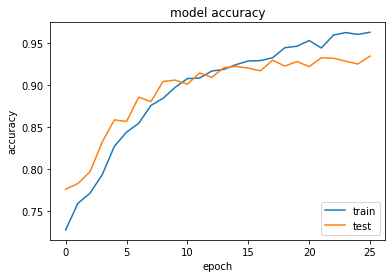

In [ ]:
target_names=['X','I','O','B']
 
y_pred=[]
y_true=[]

# Assign one-hot encodings to Y values (0,1,2,3 where 0 indicate the absence of words).
categorical_Y = to_categorical(Y)

X_train, X_test = X[train_set], X[test_set]
X_dep_train,X_dep_test=X_dep[train_set],X_dep[test_set]
Y_train, Y_test = categorical_Y[train_set], categorical_Y[test_set]

# Train the model.
model=train_MultiModal(X_train,X_dep_train,Y_train)

prediction=model.predict([X_test,X_dep_test])
for i in range(len(Y_test)):
  y_pred+=np.argmax(prediction[i], axis = 1).tolist()
  y_true+=np.argmax(Y_test[i].tolist(), axis = 1).tolist()

In [ ]:
# Print the classification report of the result of the models created.
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           X       1.00      1.00      1.00     11860
           I       0.88      0.95      0.92     13803
           O       0.87      0.78      0.82      6987
           B       0.77      0.48      0.59       900

    accuracy                           0.92     33550
   macro avg       0.88      0.80      0.83     33550
weighted avg       0.92      0.92      0.92     33550



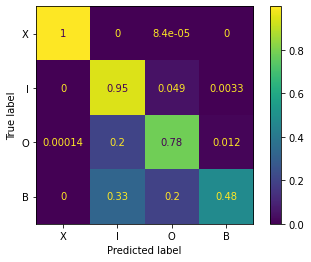

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true, y_pred,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Remove padding from results**

In [ ]:
y_true_nonzero=[]
y_pred_nonzero=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_true_temp=y_true
y_pred_temp=y_pred
for i in range(len(y_true_temp)):
    if not y_true_temp[i]==0:
      if y_pred_temp[i]==0:
        y_pred_temp[i]=2
      y_true_nonzero+=[y_true_temp[i]]
      y_pred_nonzero+=[y_pred_temp[i]]

# Print the classification report of the result of the models created.
print(classification_report(y_true_nonzero, y_pred_nonzero, target_names=['I','O','B'], zero_division=0))

              precision    recall  f1-score   support

           I       0.88      0.95      0.92     13803
           O       0.87      0.78      0.82      6987
           B       0.77      0.48      0.59       900

    accuracy                           0.88     21690
   macro avg       0.84      0.74      0.78     21690
weighted avg       0.87      0.88      0.87     21690



# **Sentences predictions**

In [ ]:
print(len(sentence_length))
print(len(sentence_list))
print(sentence_length[0:5])
print(sentence_list[0:5])

6738
6738
[14, 27, 33, 21, 24]
['it is always said that competition can effectively promote the development of economy ', 'in order to survive in the competition , companies continue to improve their products and service , and as a result , the whole society prospers ', "however , when we discuss the issue of competition or cooperation , what we are concerned about is not the whole society , but the development of an individual 's whole life ", 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education ', 'first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ']


In [ ]:
# For each sentence in the corpus contained in the test set, get two lists, one
# representing if all non argumetative words have been predicted as such (list sentence_prediction_Out),
# and the other if all argumentative words have been predicted as such (list sentence_prediction_In).

# The correlation to select the feature to pass to the STC will be evaluated only 
# on the report of the presence of an error in each sentences (not considering the type
# of the error), sentence_prediction_int list.

sentence_prediction_Out=[]
sentence_prediction_In=[]
sentence_prediction_int=[]
total_words_count=0
sentence_list_predicted=[]
test_sentence_index=[]

for i in range(0,len(sentence_length)):
  if sentence_document_id[i] in test_set:
    test_sentence_index.append(i)
    sentence_list_predicted.append(sentence_list[i])
    correct_prediction_Out='True'
    correct_prediction_In='True'
    correct_prediction_int=1
    for j in range(0,sentence_length[i]):
      if y_true_nonzero[total_words_count]==2 and (not y_pred_nonzero[total_words_count]==2):
        correct_prediction_Out='False'
        correct_prediction_int=0
      if (not y_true_nonzero[total_words_count]==2) and y_pred_nonzero[total_words_count]==2:
        correct_prediction_In='False'
        correct_prediction_int=0
      total_words_count+=1
    sentence_prediction_Out.append(correct_prediction_Out)
    sentence_prediction_In.append(correct_prediction_In)
    sentence_prediction_int.append(correct_prediction_int)

In [ ]:
len(test_sentence_index)

1046

In [ ]:
len(sentence_list_predicted)

1046

In [ ]:
sentence_prediction_Out.count("False")

286

In [ ]:
sentence_prediction_In.count("False")

272

In [ ]:
sentence_prediction_Out.count("True")

760

In [ ]:
sentence_prediction_In.count("True")

774

## **Correaltion scores**

In [ ]:
# Compute the sorted correlation scores.
# Takes in input a dataframe and a list of labels, returns the sorted (from higher to lower) 
# list of columns names and their correlation value.

def get_correlation_scores(dataframe: pd.DataFrame, labels: list)->list:
  correlation_scores= []

  columns=dataframe.columns
  for column in columns:
    correlation, p_value = spearmanr(dataframe[column].values, labels)
    # Correlation absolute value.
    correlation = np.abs(correlation)
    correlation_scores.append((correlation,column))

  # Sort the correlation scores of each word with the lable by the correlation score associated.
  correlation_scores=sorted(correlation_scores, key=lambda x: (x[0]), reverse=True)    

  return correlation_scores

## **POS preparation**

In [ ]:
# Separate each sentence in the list of POS TAG that compones them.
POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in sentence_list_predicted]

POS_sentence_list[0]

[('it', 'PRP'),
 ('is', 'VBZ'),
 ('always', 'RB'),
 ('said', 'VBD'),
 ('that', 'IN'),
 ('competition', 'NN'),
 ('can', 'MD'),
 ('effectively', 'RB'),
 ('promote', 'VB'),
 ('the', 'DT'),
 ('development', 'NN'),
 ('of', 'IN'),
 ('economy', 'NN')]

In [ ]:
# Create a version with the simplifyed version of the POS tag.

simplified_POS_sentence_list=[]

for POS_sentence in POS_sentence_list:
  simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence])

In [ ]:
simplified_POS_sentence_list[0]

[('it', 'PRON'),
 ('is', 'VERB'),
 ('always', 'ADV'),
 ('said', 'VERB'),
 ('that', 'ADP'),
 ('competition', 'NOUN'),
 ('can', 'VERB'),
 ('effectively', 'ADV'),
 ('promote', 'VERB'),
 ('the', 'DET'),
 ('development', 'NOUN'),
 ('of', 'ADP'),
 ('economy', 'NOUN')]

In [ ]:
# Get the list of the sentences as POS tag from the list of the
# list of the POS tag of each sentence. 
def get_POS_sentence_list(POS_sentence_list: list)->list:
  POS_sentences=[]
  for POS_list in POS_sentence_list:
    sentence=""
    for word, tag in POS_list:
      sentence+=tag+" "
    POS_sentences.append(sentence)    

  return POS_sentences

In [ ]:
POS_sentences=get_POS_sentence_list(POS_sentence_list)
simple_POS_sentences=get_POS_sentence_list(simplified_POS_sentence_list)

POS_sentences[0]

'PRP VBZ RB VBD IN NN MD RB VB DT NN IN NN '

## **Customised Tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  # Text tokenization.
  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

## **Bag of words**

In [ ]:
# Trasformation of the passed corpus in the dataframe of the bag of ngram contained
# in it.
def bag_of_ngram(sentence_list: list, ngram: int)-> pd.DataFrame:
  vectorizer=CountVectorizer(tokenizer=build_tokenizer,ngram_range=(ngram,ngram))
  bag_ngram=vectorizer.fit_transform(sentence_list)

  dataframe=pd.DataFrame(bag_ngram.toarray(), columns=vectorizer.get_feature_names())

  return dataframe

## **POS Bigrams**

In [ ]:
# Get the BOW of the bigrams of the POS tag.

POS_bigrams=bag_of_ngram(POS_sentences,2)
simple_POS_bigrams=bag_of_ngram(simple_POS_sentences,2)

POS_bigrams.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,$ cc,$ jj,$ jjs,$ nn,$ nns,$ rb,$ vbn,"'' ,",'' dt,'' nn,'' vbz,( nn,) nns,", ``",", cc",", cd",", dt",", ex",", fw",", in",", jj",", jjr",", jjs",", md",", nn",", nnp",", nns",", pdt",", prp",", rb",", rbr",", to",", vb",", vbd",", vbg",", vbn",", vbp",", vbz",", wdt",", wp",...,vbz wp,vbz wrb,"wdt ,",wdt dt,wdt jj,wdt md,wdt nn,wdt nns,wdt prp,wdt rb,wdt vbd,wdt vbp,wdt vbz,wdt wrb,wp dt,wp in,wp jj,wp md,wp nn,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,wrb cc,wrb cd,wrb dt,wrb ex,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb prp,wrb rb,wrb to,wrb vbg,wrb vbz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**correlation score**

In [ ]:
# Compute the correlation scores considering only the train test sentences.
train_correlation_scores_POS_bigram=get_correlation_scores(POS_bigrams,sentence_prediction_int)
train_correlation_scores_simple_POS_bigram=get_correlation_scores(simple_POS_bigrams,sentence_prediction_int)

In [ ]:
train_correlation_scores_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_POS_bigram[0:10]

[(0.11018837934009829, 'jj nns'),
 (0.10795338798307245, 'nn cc'),
 (0.10650171388986138, ', nn'),
 (0.10313151023522782, 'dt in'),
 (0.10061720747690878, 'in jj'),
 (0.09524607927235774, 'in dt'),
 (0.09380236859388903, 'nn ,'),
 (0.08883595275536904, 'nn in'),
 (0.08728537915320143, 'cc dt'),
 (0.08704120595554934, 'nns cc')]

In [ ]:
most_correlated_bigram_POS=[bigram[1] for bigram in train_correlation_scores_POS_bigram[0:100]]

In [ ]:
most_correlated_bigram_POS[0:3]

['jj nns', 'nn cc', ', nn']

In [ ]:
train_correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in train_correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_simple_POS_bigram[0:10]

[(0.13690919999313442, 'noun conj'),
 (0.11793030619953433, 'adj noun'),
 (0.11026200263196001, 'noun .'),
 (0.10898245363095184, 'adp adj'),
 (0.10313151023522782, 'det adp'),
 (0.10288663307802404, 'noun adp'),
 (0.10084870749360152, '. noun'),
 (0.08825954970036426, 'conj det'),
 (0.08784097766126774, 'adp det'),
 (0.0765579959954422, 'num noun')]

In [ ]:
most_correlated_bigram_simple_POS=[bigram[1] for bigram in train_correlation_scores_simple_POS_bigram[0:100]]

## **Bag of words and Bigrams correlation**

In [ ]:
bag_words_dataframe=bag_of_ngram(sentence_list_predicted, 1)
bag_bigrams_dataframe=bag_of_ngram(sentence_list_predicted, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_words_dataframe.head()

,!,%,','','innovate,'m,'s,'teachers,'this,'ve,'your,(,),",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,?,``,a,ability,able,about,above,above-mentioned,abroad,absence,absolutely,...,with,within,without,witnessed,woman,won,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worried,worrying,worse,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,yet,yield,you,young,youngster,your,youth,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_bigrams_dataframe.head()

,"% ,",' accomplishment,' attention,' basic,' confidence,' economic,' effectiveness,' health,' kind,' knowledge,' learning,' life,' mental,' mistake,' personality,' profit,' progress,' school,' spelling,' the,"'' ,",'' is,'innovate ','m in,'m totally,'s a,'s access,'s achievement,'s an,'s birthday,'s characteristic,'s choice,'s daily,'s dependence,'s eating,'s electricity,'s environmental,'s fun,'s future,'s good,...,you want,young age,young generation,young one,young owner,young people,young wishful,"youngster ,",your classmate,your clothes,your doubt,your future,your group,your job,your life,your major,your performance,your skill,your student,youth should,zappa once,"zoo ,",zoo afford,zoo are,zoo for,zoo have,zoo is,zoo kept,zoo not,zoo offer,zoo provide,zoo should,zoo they,zoo where,zoo will,zoo would,zoo you,– the,’ s,’ t
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

train_correlation_scores_words=get_correlation_scores(bag_words_dataframe,sentence_prediction_int)
train_correlation_scores_bigram=get_correlation_scores(bag_bigrams_dataframe,sentence_prediction_int)

In [ ]:
train_correlation_scores_words=[correlation_score for correlation_score in train_correlation_scores_words if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_words[0:10]

[(0.14879541794736437, 'and'),
 (0.14493737846655672, ','),
 (0.11588924589952664, 'sport'),
 (0.10694883214819045, 'thus'),
 (0.10367445222780369, 'fact'),
 (0.08941867515278856, 'the'),
 (0.08923064253285284, 'in'),
 (0.08774559216206174, 'course'),
 (0.08705800413726236, 'word'),
 (0.08479355970982135, 'understanding')]

In [ ]:
most_correlated_word=[word[1] for word in train_correlation_scores_words[0:100]]

In [ ]:
train_correlation_scores_bigram=[correlation_score for correlation_score in train_correlation_scores_bigram if not math.isnan(correlation_score[0])]

In [ ]:
train_correlation_scores_bigram[0:10]

[(0.1131670124240236, 'thus ,'),
 (0.08479355970982135, 'reduce the'),
 (0.08183449536514073, 'to reduce'),
 (0.0813861552357641, 'some of'),
 (0.0755262492439802, 'that i'),
 (0.07215794994881955, ', which'),
 (0.07159476351502915, 'a child'),
 (0.07159476351502915, 'and a'),
 (0.07159476351502915, 'co-operative approach'),
 (0.07159476351502915, 'fact that')]

In [ ]:
most_correlated_bigram=[bigram[1] for bigram in train_correlation_scores_bigram[0:100]]

# **STC**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

statistic=pd.read_csv('sentence_statistic.csv')
statistic=statistic.iloc[test_sentence_index]
statistic.reset_index(drop=True, inplace=True)

POS=pd.read_csv('sentence_POS.csv')
POS=POS.iloc[test_sentence_index]
POS.reset_index(drop=True, inplace=True)

simple_POS=pd.read_csv('sentence_simple_POS.csv')
simple_POS=simple_POS.iloc[test_sentence_index]
simple_POS.reset_index(drop=True, inplace=True)

bigram_POS=POS_bigrams[most_correlated_bigram_POS]
bigram_POS.reset_index(drop=True, inplace=True)

bigram_simple_POS=simple_POS_bigrams[most_correlated_bigram_simple_POS]
bigram_simple_POS.reset_index(drop=True, inplace=True)

dependency=pd.read_csv('sentence_dependency.csv')
dependency=dependency.iloc[test_sentence_index]
dependency.reset_index(drop=True, inplace=True)

dependency_tree_stat=pd.read_csv('sentence_dependency_tree_stat.csv')
dependency_tree_stat=dependency_tree_stat.iloc[test_sentence_index]
dependency_tree_stat.reset_index(drop=True, inplace=True)

named_entity=pd.read_csv('sentence_named_entity_BOW.csv')
named_entity=named_entity.iloc[test_sentence_index]
named_entity.reset_index(drop=True, inplace=True)

BOW=bag_words_dataframe[most_correlated_word]
BOW.reset_index(drop=True, inplace=True)

Bigram=bag_bigrams_dataframe[most_correlated_bigram]
Bigram.reset_index(drop=True, inplace=True)

imported_ngram=pd.read_csv('essay_BOW_appendix_words.csv')
imported_ngram=imported_ngram.iloc[test_sentence_index]
imported_ngram.reset_index(drop=True, inplace=True)

others=pd.read_csv('remaining_stat.csv')
others=others.iloc[test_sentence_index]
others.reset_index(drop=True, inplace=True)

In [ ]:
statistic.shape

(1046, 7)

In [ ]:
bigram_POS.shape

(1046, 100)

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
dataframe_non_used=statistic
dataframe_non_used=pd.concat([dataframe_non_used,POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency_tree_stat], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,named_entity], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,imported_ngram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,others], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,BOW], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,Bigram], axis=1)
print(dataframe_non_used.shape)

dataframe_used=dependency

dataframe_both=pd.concat([dataframe_non_used,dependency], axis=1)

(1046, 45)
(1046, 57)
(1046, 59)
(1046, 76)
(1046, 116)
(1046, 117)
(1046, 217)
(1046, 317)
(1046, 417)
(1046, 517)


In [ ]:
dataframe_used.shape

(1046, 44)

In [ ]:
sentence_predictions_In = pd.DataFrame(data={'argumentative': sentence_prediction_In})
sentence_predictions_Out = pd.DataFrame(data={'argumentative': sentence_prediction_Out})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_Out=-1
pos_In=-1
count=0
instance_In=""
istance_Out=""

for i in test_index:
  if sentence_prediction_Out[i]=='False':
    instance_Out=sentence_list_predicted[i]
    pos_Out=count
  if sentence_prediction_In[i]=='False':
    instance_In=sentence_list_predicted[i]
    pos_In=count
  if not (pos_Out==-1 or pos_In==-1):
    break
  count+=1  

print(instance_In)
print(instance_Out)
print(pos_In)
print(pos_Out)

it resulted in the missing of information and the lack of details during their works 
looking from another perspective , written words are also vital in order to spread across certain messages 
5
3


In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 0.7, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Both not and used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_both,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6857142857142857
f1 score: 0.8012048192771084
precision: 0.7471910112359551
recall: 0.8636363636363636


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,total sentences in paragraph: 9,0.000576
True,loss: 1,0.000524
True,process: 1,0.000524
True,viewpoint: 1,0.000471
True,dt vbz: 1,0.000416
True,'': 1,0.000414
True,``: 1,0.000414
True,verb noun: 3,0.000414
True,progress: 1,0.000414


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,",: 5",0.000927
False,to reduce: 1,0.000927
False,reduce the: 1,0.000816
False,wdt vbd: 1,0.000816
False,number words in sentence: 30,0.000810
False,reduce: 1,0.000702
False,study the: 1,0.000698
False,early age: 1,0.000698
False,.: 5,0.000698


In [ ]:
explainability.loc[(pos_Out,'False')][0:15]

features         score
item argumentative                                                        
3    False                                           word: 1  3.888776e-07
     False                                           conj: 0  2.536415e-07
     False                                             cc: 0  2.508217e-07
     False                             sentence in essay: 10  1.421568e-07
     False                                            acl: 1  1.409900e-07
     False                                            det: 1  1.160269e-07
     False                             paragraph in essay: 2  1.128182e-07
     False                                        adp det: 1  7.932618e-08
     False          max number of children of a ROOT node: 6  7.031029e-08
     False                                         jj nns: 1  6.953853e-08
     False                                             nn: 2  6.905245e-08
     False                                         . verb: 1  6.591077e-08
     False                          sentence in paragraph: 0  6.147957e-08
     False                                           verb: 4  5.598225e-08
     False                                            and: 0  5.235470e-08

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_both,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7238095238095238
f1 score: 0.8313953488372093
precision: 0.7606382978723404
recall: 0.9166666666666666


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,ex vbz: 1,0.000840
True,there is: 1,0.000798
True,sentence in paragraph: 6,0.000754
True,jjr: 2,0.000754
True,in ex: 1,0.000617
True,sentence in essay: 20,0.000617
True,number words in sentence: 11,0.000590
True,loss: 1,0.000517
True,max number of children of a ROOT node: 10,0.000517


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,follow: 1,0.000725
False,sport: 1,0.000654
False,or the: 1,0.000593
False,can get: 1,0.000593
False,pdt dt: 1,0.000593
False,pdt: 1,0.000593
False,rbr in: 1,0.000521
False,pron conj: 1,0.000455
False,vbd: 3,0.000446


In [ ]:
explainability.loc[(pos_In,'False')][0:15]

features         score
item argumentative                           
5    False              pobj: 4  3.391794e-07
     False              prep: 4  2.423825e-07
     False                 ,: 0  2.292319e-07
     False            during: 1  1.806171e-07
     False              verb: 1  1.614968e-07
     False               adp: 4  1.609126e-07
     False                cc: 1  1.545903e-07
     False                in: 4  1.507259e-07
     False          conj det: 1  1.407008e-07
     False              conj: 1  1.354857e-07
     False            vbd in: 1  1.274319e-07
     False               and: 1  1.139410e-07
     False              amod: 0  1.085006e-07
     False             punct: 0  9.282086e-08
     False             cc dt: 1  8.391476e-08

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7
f1 score: 0.809667673716012
precision: 0.7570621468926554
recall: 0.8701298701298701


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,total sentences in paragraph: 9,0.000610
True,process: 1,0.000555
True,loss: 1,0.000555
True,viewpoint: 1,0.000498
True,dt vbz: 1,0.000440
True,'': 1,0.000439
True,``: 1,0.000439
True,verb noun: 3,0.000439
True,progress: 1,0.000439


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,to reduce: 1,0.000982
False,",: 5",0.000982
False,reduce the: 1,0.000864
False,wdt vbd: 1,0.000864
False,number words in sentence: 30,0.000857
False,reduce: 1,0.000743
False,study the: 1,0.000739
False,early age: 1,0.000739
False,.: 5,0.000739


In [ ]:
explainability.loc[(pos_Out,'False')][0:15]

features         score
item argumentative                                                        
3    False                                           word: 1  4.468028e-07
     False                             sentence in essay: 10  1.633317e-07
     False                             paragraph in essay: 2  1.296230e-07
     False                                        adp det: 1  9.114220e-08
     False                                             cc: 0  8.756962e-08
     False                                           conj: 0  8.756962e-08
     False          max number of children of a ROOT node: 6  8.078335e-08
     False                                         jj nns: 1  7.989662e-08
     False                                             nn: 2  7.933814e-08
     False                                         . verb: 1  7.572849e-08
     False                          sentence in paragraph: 0  7.063724e-08
     False                                           verb: 4  6.432107e-08
     False                                            and: 0  6.015318e-08
     False                                       verb adj: 0  5.871239e-08
     False                   total paragraphs in document: 4  5.540948e-08

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8328445747800587
precision: 0.7675675675675676
recall: 0.9102564102564102


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,ex vbz: 1,0.000890
True,there is: 1,0.000845
True,jjr: 2,0.000799
True,sentence in paragraph: 6,0.000799
True,sentence in essay: 20,0.000653
True,in ex: 1,0.000653
True,number words in sentence: 11,0.000625
True,max number of children of a ROOT node: 10,0.000548
True,prepared: 1,0.000548


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,follow: 1,0.000768
False,sport: 1,0.000693
False,or the: 1,0.000628
False,can get: 1,0.000628
False,pdt dt: 1,0.000628
False,pdt: 1,0.000628
False,rbr in: 1,0.000552
False,pron conj: 1,0.000481
False,vbd: 3,0.000472


In [ ]:
explainability.loc[(pos_In,'False')][0:15]

features         score
item argumentative                             
5    False                   ,: 0  2.633771e-07
     False              during: 1  2.075209e-07
     False                verb: 1  1.855525e-07
     False                 adp: 4  1.848813e-07
     False                  in: 4  1.731773e-07
     False            conj det: 1  1.616589e-07
     False              vbd in: 1  1.464135e-07
     False                 and: 1  1.309131e-07
     False               cc dt: 1  9.641427e-08
     False           noun conj: 1  9.465626e-08
     False                 vbg: 0  8.521650e-08
     False                  jj: 0  7.906839e-08
     False          tree depth: 6  7.100075e-08
     False                conj: 1  7.084229e-08
     False                  cc: 1  7.084229e-08

## **Used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_used,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6761904761904762
f1 score: 0.8023255813953488
precision: 0.7263157894736842
recall: 0.8961038961038961


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,aux: 5,0.002105
True,det: 7,0.001721
True,quantmod: 1,0.001721
True,conj: 5,0.001296
True,advmod: 7,0.001296
True,po: 4,0.001296
True,agent: 2,0.001296
True,amod: 5,0.001015
True,cc: 5,0.000798


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,pobj: 7,0.003391
False,npadvmod: 2,0.003391
False,nsubj: 6,0.003391
False,aux: 4,0.003310
False,acl: 3,0.002553
False,root: 3,0.002553
False,po: 5,0.001572
False,ccomp: 4,0.001572
False,nsubj: 9,0.001572


In [ ]:
explainability.loc[(pos_Out,'False')][0:15]

features         score
item argumentative                           
3    False               acl: 1  1.067962e-05
     False              conj: 0  6.055468e-06
     False                cc: 0  5.923369e-06
     False             relcl: 0  2.827842e-06
     False               det: 1  2.534810e-06
     False             punct: 1  1.883465e-06
     False             xcomp: 0  1.609781e-06
     False            advmod: 1  1.213117e-06
     False              dobj: 0  8.633187e-07
     False                po: 0  5.108861e-07
     False             advcl: 1  3.869448e-07
     False              attr: 0  2.992330e-07
     False          npadvmod: 0  2.708592e-07
     False              pobj: 3  2.604368e-07
     False          compound: 0  2.241418e-07

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_used,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8285714285714285
precision: 0.7474226804123711
recall: 0.9294871794871795


In [ ]:
global_explainability_tabular.loc["True"][:25]

,features,score
argumentative,,
True,ccomp: 3,0.002428
True,mark: 4,0.002077
True,prep: 0,0.001831
True,pobj: 7,0.001698
True,npadvmod: 2,0.001698
True,expl: 1,0.001411
True,xcomp: 2,0.001333
True,pobj: 0,0.001301
True,conj: 5,0.001278


In [ ]:
global_explainability_tabular.loc["False"][:25]

,features,score
argumentative,,
False,po: 4,0.002651
False,xcomp: 3,0.001662
False,po: 5,0.001632
False,prep: 9,0.001632
False,pobj: 9,0.001632
False,relcl: 3,0.001632
False,acomp: 3,0.001632
False,agent: 3,0.001632
False,dobj: 6,0.001632


In [ ]:
explainability.loc[(pos_In,'False')][0:15]

features         score
item argumentative                           
5    False              pobj: 4  2.569193e-05
     False              prep: 4  1.835983e-05
     False              amod: 0  8.218629e-06
     False             punct: 0  7.030932e-06
     False             nsubj: 1  5.583213e-06
     False              dobj: 0  3.994530e-06
     False                cc: 1  2.671727e-06
     False                po: 1  2.378728e-06
     False              conj: 1  1.887358e-06
     False              mark: 0  1.563176e-06
     False            advmod: 0  1.483832e-06
     False               det: 2  1.242529e-06
     False             pcomp: 0  1.118362e-06
     False             relcl: 0  1.011116e-06
     False          compound: 0  9.502069e-07

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6952380952380952
f1 score: 0.815028901734104
precision: 0.734375
recall: 0.9155844155844156


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,total sentences in paragraph: 9,0.013795
True,sentence in essay: 0,0.008006
True,number words in sentence: 7,0.007388
True,sentence in essay: 23,0.006943
True,number words in sentence: 6,0.006552
True,sentence in essay: 25,0.005227
True,number words in sentence: 26,0.004763
True,number words in sentence: 22,0.004001
True,sentence in essay: 26,0.003218


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,number words in sentence: 30,0.019406
False,number words in sentence: 46,0.010299
False,number words in sentence: 31,0.007219
False,number words in sentence: 50,0.006340
False,number words in sentence: 43,0.006340
False,number words in sentence: 38,0.006340
False,number words in sentence: 48,0.006340
False,number words in sentence: 57,0.006340
False,number words in sentence: 44,0.006340


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features     score
item argumentative                                           
3    False                    sentence in essay: 10  0.000319
     False                    paragraph in essay: 2  0.000253
     False                 sentence in paragraph: 0  0.000138
     False          total paragraphs in document: 4  0.000108
     False          total sentences in paragraph: 5  0.000088

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8318584070796459
precision: 0.7704918032786885
recall: 0.9038461538461539


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,sentence in paragraph: 6,0.018073
True,sentence in essay: 20,0.014777
True,number words in sentence: 11,0.014143
True,number words in sentence: 9,0.011739
True,sentence in essay: 23,0.006848
True,number words in sentence: 39,0.006848
True,number words in sentence: 42,0.006848
True,number words in sentence: 6,0.006021
True,sentence in paragraph: 8,0.005156


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,sentence in essay: 25,0.010693
False,number words in sentence: 28,0.007935
False,total sentences in paragraph: 1,0.007827
False,number words in sentence: 50,0.006582
False,number words in sentence: 58,0.006582
False,number words in sentence: 29,0.006408
False,number words in sentence: 27,0.006204
False,paragraph in essay: 5,0.006004
False,number words in sentence: 32,0.004080


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features     score
item argumentative                                           
5    False          total sentences in paragraph: 5  0.000110
     False                    paragraph in essay: 2  0.000099
     False          total paragraphs in document: 4  0.000057
     False                 sentence in paragraph: 2  0.000034
     False                    sentence in essay: 10  0.000004

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8275862068965517
precision: 0.7422680412371134
recall: 0.935064935064935


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,'': 1,0.002678
True,``: 1,0.002678
True,jj: 0,0.002264
True,vb: 5,0.001873
True,pdt: 1,0.001873
True,vbd: 3,0.001410
True,vbz: 4,0.001410
True,nnp: 1,0.001410
True,dt: 8,0.001410


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,vbd: 4,0.003690
False,",: 5",0.003690
False,in: 7,0.003391
False,nns: 7,0.002778
False,vbd: 5,0.002778
False,to: 3,0.002291
False,vb: 4,0.001891
False,$: 5,0.001710
False,prp: 10,0.001710


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features     score
item argumentative                   
3    False            cc: 0  0.000007
     False            nn: 2  0.000006
     False           nns: 2  0.000004
     False            jj: 2  0.000004
     False           vbp: 1  0.000003

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8285714285714285
precision: 0.7474226804123711
recall: 0.9294871794871795


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,jjr: 2,0.004875
True,in: 0,0.002994
True,fw: 1,0.002259
True,rb: 5,0.002259
True,vb: 5,0.001847
True,to: 4,0.001847
True,vbz: 4,0.001391
True,nnp: 1,0.001391
True,to: 5,0.001391


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,pdt: 1,0.003831
False,vbd: 3,0.002884
False,dt: 8,0.002884
False,$: 4,0.002884
False,wp: 2,0.001809
False,$: 5,0.001776
False,prp: 7,0.001776
False,(: 1,0.001776
False,): 1,0.001776


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features     score
item argumentative                   
5    False            in: 4  0.000015
     False           vbg: 0  0.000007
     False             ,: 0  0.000007
     False            jj: 0  0.000006
     False            cc: 1  0.000006

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8265895953757224
precision: 0.7447916666666666
recall: 0.9285714285714286


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,det: 8,0.004274
True,adj: 0,0.003316
True,prt: 5,0.003218
True,adv: 5,0.002039
True,conj: 5,0.001981
True,det: 9,0.001981
True,noun: 16,0.001981
True,adj: 7,0.001981
True,pron: 8,0.001981


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,.: 5,0.010299
False,adp: 7,0.007738
False,noun: 15,0.006340
False,verb: 12,0.006340
False,adv: 6,0.006340
False,pron: 7,0.006340
False,verb: 13,0.003903
False,pron: 11,0.003903
False,.: 7,0.003903


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features     score
item argumentative                   
3    False          conj: 0  0.000053
     False          verb: 4  0.000039
     False           det: 1  0.000026
     False          pron: 0  0.000021
     False           adp: 3  0.000013

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7047619047619048
f1 score: 0.8208092485549133
precision: 0.7473684210526316
recall: 0.9102564102564102


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,adp: 0,0.006833
True,x: 1,0.006028
True,prt: 4,0.005156
True,noun: 0,0.005156
True,noun: 14,0.005156
True,noun: 2,0.004344
True,verb: 1,0.004160
True,noun: 13,0.003174
True,prt: 5,0.003174


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,det: 9,0.004052
False,noun: 16,0.004052
False,pron: 8,0.004052
False,pron: 5,0.003696
False,noun: 11,0.002512
False,det: 8,0.002275
False,noun: 10,0.001954
False,adp: 0,0.001667
False,noun: 2,0.001404


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features     score
item argumentative                   
5    False          verb: 1  0.000111
     False           adp: 4  0.000111
     False          conj: 1  0.000043
     False             .: 0  0.000041
     False           adj: 0  0.000031

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_Out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6761904761904762
f1 score: 0.7834394904458599
precision: 0.76875
recall: 0.7987012987012987


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,dt vbz: 1,0.001391
True,dt jj: 4,0.001385
True,dt nn: 5,0.001185
True,vbp vbz: 1,0.000969
True,to vb: 4,0.000969
True,jj nns: 4,0.000969
True,pdt dt: 1,0.000969
True,", nn: 3",0.000729
True,in wp: 1,0.000729


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,wdt vbd: 1,0.002729
False,rb cd: 1,0.001909
False,dt dt: 1,0.001909
False,nns :: 1,0.001909
False,prp jj: 1,0.001633
False,dt vbd: 1,0.001437
False,vbp wrb: 1,0.001437
False,vbg jjr: 1,0.001437
False,: nn: 1,0.001437


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                          
3    False           jj nns: 1  1.304555e-06
     False            in dt: 1  8.840478e-07
     False            dt nn: 1  7.957964e-07
     False            nn in: 0  7.066030e-07
     False          nns vbp: 1  5.285512e-07

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_In)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8357348703170029
precision: 0.7591623036649214
recall: 0.9294871794871795


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,ex vbz: 1,0.002809
True,in ex: 1,0.002062
True,", md: 1",0.001169
True,vbp vbz: 1,0.000956
True,jj nn: 5,0.000956
True,po nn: 2,0.000956
True,vbd in: 2,0.000956
True,to vb: 4,0.000956
True,nns :: 1,0.000956


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,pdt dt: 1,0.001982
False,rbr in: 1,0.001743
False,jj wp: 1,0.001492
False,to vbg: 1,0.001492
False,cd rb: 1,0.001492
False,prp cc: 1,0.001347
False,dt nn: 5,0.000936
False,dt in: 2,0.000919
False,nn in: 7,0.000919


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                         
5    False          vbd in: 1  2.390645e-06
     False           cc dt: 1  1.574256e-06
     False           nn cc: 1  1.104142e-06
     False          in prp: 1  1.085934e-06
     False           dt nn: 2  9.855137e-07

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_Out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7
f1 score: 0.8119402985074627
precision: 0.7513812154696132
recall: 0.8831168831168831


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,verb noun: 3,0.001385
True,det adj: 4,0.001385
True,. noun: 3,0.000969
True,verb pron: 3,0.000969
True,prt verb: 4,0.000969
True,prt adj: 1,0.000928
True,verb det: 4,0.000729
True,adv adp: 2,0.000729
True,adv prt: 2,0.000729


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,noun verb: 6,0.001437
False,noun prt: 3,0.001437
False,adv noun: 2,0.001437
False,conj noun: 2,0.001291
False,adv num: 1,0.001255
False,prt noun: 2,0.000967
False,adj adp: 3,0.000885
False,noun adp: 6,0.000885
False,verb adp: 5,0.000885


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                            
3    False            adp det: 1  1.488173e-06
     False             . verb: 1  1.236497e-06
     False           verb adj: 0  9.586580e-07
     False           noun prt: 1  6.808334e-07
     False          verb noun: 1  5.245362e-07

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_In)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6714285714285714
f1 score: 0.7964601769911505
precision: 0.7377049180327869
recall: 0.8653846153846154


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,num adp: 1,0.001366
True,adp prt: 1,0.001366
True,adj noun: 6,0.000956
True,adv det: 2,0.000956
True,prt verb: 4,0.000956
True,adv verb: 3,0.000956
True,adv adj: 2,0.000729
True,prt noun: 2,0.000729
True,verb det: 4,0.000719


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,pron conj: 1,0.001520
False,adj verb: 2,0.001492
False,adv prt: 2,0.001492
False,num adv: 1,0.001492
False,pron verb: 4,0.001492
False,pron noun: 4,0.001492
False,conj pron: 1,0.001477
False,noun num: 1,0.000936
False,. conj: 2,0.000936


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                            
5    False           conj det: 1  2.639572e-06
     False          noun conj: 1  1.545551e-06
     False          noun verb: 0  1.120475e-06
     False           adp pron: 1  1.004439e-06
     False           adj noun: 0  9.263022e-07

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6761904761904762
f1 score: 0.8023255813953488
precision: 0.7263157894736842
recall: 0.8961038961038961


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,aux: 5,0.002105
True,det: 7,0.001721
True,quantmod: 1,0.001721
True,conj: 5,0.001296
True,advmod: 7,0.001296
True,po: 4,0.001296
True,agent: 2,0.001296
True,amod: 5,0.001015
True,cc: 5,0.000798


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,pobj: 7,0.003391
False,npadvmod: 2,0.003391
False,nsubj: 6,0.003391
False,aux: 4,0.003310
False,acl: 3,0.002553
False,root: 3,0.002553
False,po: 5,0.001572
False,ccomp: 4,0.001572
False,nsubj: 9,0.001572


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features     score
item argumentative                    
3    False            acl: 1  0.000011
     False           conj: 0  0.000006
     False             cc: 0  0.000006
     False          relcl: 0  0.000003
     False            det: 1  0.000003

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8285714285714285
precision: 0.7474226804123711
recall: 0.9294871794871795


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,ccomp: 3,0.002428
True,mark: 4,0.002077
True,prep: 0,0.001831
True,pobj: 7,0.001698
True,npadvmod: 2,0.001698
True,expl: 1,0.001411
True,xcomp: 2,0.001333
True,pobj: 0,0.001301
True,conj: 5,0.001278


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,po: 4,0.002651
False,xcomp: 3,0.001662
False,po: 5,0.001632
False,prep: 9,0.001632
False,pobj: 9,0.001632
False,relcl: 3,0.001632
False,acomp: 3,0.001632
False,agent: 3,0.001632
False,dobj: 6,0.001632


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features     score
item argumentative                    
5    False           pobj: 4  0.000026
     False           prep: 4  0.000018
     False           amod: 0  0.000008
     False          punct: 0  0.000007
     False          nsubj: 1  0.000006

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7047619047619048
f1 score: 0.8208092485549133
precision: 0.7395833333333334
recall: 0.922077922077922


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,tree depth: 2,0.013069
True,max number of children of a ROOT node: 3,0.004442
True,tree depth: 9,0.004150
True,max number of children of a ROOT node: 6,0.003975
True,max number of children of a ROOT node: 9,0.003782
True,tree depth: 10,0.003331
True,max number of children of a ROOT node: 2,0.002357
True,tree depth: 11,0.002319
True,max number of children of a ROOT node: 10,0.001225


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,tree depth: 15,0.013679
False,max number of children of a ROOT node: 9,0.008694
False,tree depth: 10,0.006563
False,tree depth: 9,0.006455
False,tree depth: 2,0.003090
False,max number of children of a ROOT node: 2,0.002404
False,max number of children of a ROOT node: 3,0.002159
False,max number of children of a ROOT node: 6,0.002040
False,max number of children of a ROOT node: 10,0.001809


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features     score
item argumentative                                                    
3    False          max number of children of a ROOT node: 6  0.001020
     False                                     tree depth: 6  0.000186

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7142857142857143
f1 score: 0.8285714285714285
precision: 0.7474226804123711
recall: 0.9294871794871795


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,max number of children of a ROOT node: 10,0.026740
True,max number of children of a ROOT node: 1,0.024005
True,tree depth: 2,0.011511
True,max number of children of a ROOT node: 12,0.011125
True,tree depth: 12,0.011125
True,tree depth: 13,0.011125
True,tree depth: 15,0.006848
True,tree depth: 10,0.003738
True,tree depth: 3,0.003641


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,tree depth: 10,0.007752
False,max number of children of a ROOT node: 9,0.005103
False,tree depth: 8,0.003482
False,tree depth: 2,0.002865
False,tree depth: 11,0.002846
False,tree depth: 3,0.001819
False,tree depth: 6,0.001793
False,max number of children of a ROOT node: 6,0.001556
False,tree depth: 4,0.001136


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features     score
item argumentative                                                    
5    False                                     tree depth: 6  0.000896
     False          max number of children of a ROOT node: 2  0.000481

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8429752066115703
precision: 0.7320574162679426
recall: 0.9935064935064936


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,norp: 2,0.002522
True,time: 1,0.001598
True,person: 4,0.001552
True,gpe: 2,0.001552
True,percent: 2,0.001552
True,event: 2,0.001552
True,person: 2,0.001552
True,quantity: 1,0.001552
True,ordinal: 2,0.001552


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,cardinal: 2,0.004968
False,gpe: 3,0.003058
False,date: 2,0.002622
False,percent: 1,0.001614
False,loc: 1,0.000376
False,time: 1,0.000350
False,gpe: 1,0.000149
False,org: 1,0.000104
False,norp: 1,0.000064


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                           
3    False              time: 0  1.114077e-07
     False              date: 0  7.941742e-08
     False               org: 0  6.533515e-08
     False          cardinal: 0  5.356939e-08
     False           ordinal: 0  4.388383e-08

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7
f1 score: 0.8225352112676055
precision: 0.7336683417085427
recall: 0.9358974358974359


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,date: 2,0.005367
True,percent: 1,0.003304
True,norp: 2,0.002487
True,cardinal: 2,0.002487
True,gpe: 3,0.001531
True,gpe: 2,0.001531
True,gpe: 1,0.001036
True,person: 1,0.001009
True,org: 1,0.000528


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,gpe: 1,0.003761
False,person: 4,0.003175
False,percent: 2,0.003175
False,event: 2,0.003175
False,person: 2,0.003175
False,quantity: 1,0.003175
False,ordinal: 2,0.003175
False,norp: 1,0.000732
False,cardinal: 1,0.000541


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                           
5    False               gpe: 0  4.965656e-07
     False           ordinal: 0  3.034543e-07
     False          cardinal: 0  2.773862e-07
     False               org: 0  1.559270e-07
     False              time: 0  7.379220e-08

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_Out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6714285714285714
f1 score: 0.7737704918032786
precision: 0.7814569536423841
recall: 0.7662337662337663


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,process: 1,0.001753
True,loss: 1,0.001753
True,viewpoint: 1,0.001574
True,in: 3,0.001574
True,progress: 1,0.001385
True,improvement: 1,0.001385
True,must: 1,0.001385
True,ability: 1,0.001385
True,measure: 1,0.001185


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,reduce: 1,0.002348
False,basic: 1,0.001909
False,",: 5",0.001909
False,forced: 1,0.001909
False,waste: 1,0.001909
False,fact: 1,0.001863
False,boring: 1,0.001437
False,traffic: 1,0.001403
False,controversy: 1,0.001255


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                        
3    False           word: 1  7.295412e-06
     False             in: 1  1.248450e-06
     False            and: 0  9.821832e-07
     False          vital: 1  6.008708e-07
     False             on: 0  2.659391e-07

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_In)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6190476190476191
f1 score: 0.7419354838709679
precision: 0.7467532467532467
recall: 0.7371794871794872


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,prepared: 1,0.001729
True,loss: 1,0.001729
True,progress: 1,0.001366
True,improvement: 1,0.001366
True,must: 1,0.001366
True,ability: 1,0.001366
True,daily: 1,0.001366
True,them: 2,0.001169
True,measure: 1,0.001169


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,follow: 1,0.002424
False,sport: 1,0.002188
False,boring: 1,0.001492
False,captured: 1,0.001492
False,violence: 1,0.001492
False,catch: 1,0.001492
False,vital: 1,0.001347
False,through: 1,0.001179
False,whether: 1,0.001113


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                         
5    False          during: 1  3.388409e-06
     False             and: 1  2.137553e-06
     False               ,: 0  1.323613e-06
     False             the: 2  7.754430e-07
     False               a: 0  5.074680e-07

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_Out)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7
f1 score: 0.8025078369905956
precision: 0.7757575757575758
recall: 0.8311688311688312


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,of competition: 1,0.001385
True,although the: 1,0.001185
True,of news: 1,0.001185
True,when people: 1,0.001185
True,better than: 1,0.001185
True,plan for: 1,0.001185
True,they will: 1,0.001185
True,ability to: 1,0.001185
True,of technology: 1,0.001185


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,to reduce: 1,0.003101
False,reduce the: 1,0.002729
False,study the: 1,0.002335
False,early age: 1,0.002335
False,than any: 1,0.002335
False,that if: 1,0.002335
False,and in: 1,0.002335
False,that i: 1,0.001997
False,and this: 1,0.001909


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                             
3    False             , which: 0  1.221527e-07
     False           to reduce: 0  3.324016e-08
     False                in a: 0  2.948734e-08
     False              that i: 0  2.922716e-08
     False          reduce the: 0  2.307614e-08

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_In)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8298507462686566
precision: 0.776536312849162
recall: 0.8910256410256411


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,there is: 1,0.002667
True,to think: 1,0.001729
True,"technology ,: 1",0.001552
True,will help: 1,0.001366
True,although the: 1,0.001169
True,of news: 1,0.001169
True,when people: 1,0.001169
True,better than: 1,0.001169
True,plan for: 1,0.001169


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,or the: 1,0.001982
False,can get: 1,0.001982
False,sport event: 1,0.001492
False,a police: 1,0.001492
False,of violence: 1,0.001492
False,of them: 1,0.001179
False,some of: 2,0.000919
False,different field: 1,0.000919
False,carbon dioxide: 1,0.000919


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                            
5    False          example ,: 0  8.453919e-08
     False            and the: 1  6.020054e-08
     False          , student: 0  2.441967e-08
     False           there is: 0  2.178229e-08
     False            of them: 0  1.872142e-08

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7285714285714285
f1 score: 0.8376068376068376
precision: 0.7461928934010152
recall: 0.9545454545454546


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,clearly: 1,0.002250
True,in conclusion: 1,0.001763
True,therefore: 1,0.000947
True,in that: 1,0.000853
True,accordingly: 1,0.000853
True,thus: 1,0.000449
True,for: 2,0.000409
True,since: 1,0.000321
True,whereas: 1,0.000225


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,deduced: 1,0.001680
False,in view of: 1,0.001680
False,whereas: 1,0.000887
False,thus: 1,0.000885
False,for: 2,0.000806
False,in conclusion: 1,0.000347
False,due to: 1,0.000326
False,therefore: 1,0.000249
False,in short: 1,0.000206


In [ ]:
explainability.loc[(pos_Out,'False')][0:5]

features         score
item argumentative                                
3    False                    for: 0  1.703133e-07
     False          in conclusion: 0  1.425341e-07
     False                   thus: 0  1.098598e-07
     False              therefore: 0  6.155963e-08
     False                 due to: 0  1.956039e-08

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6666666666666666
f1 score: 0.7953216374269005
precision: 0.7311827956989247
recall: 0.8717948717948718


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,whereas: 1,0.001815
True,in that: 1,0.000841
True,in view of: 1,0.000841
True,accordingly: 1,0.000841
True,in addition: 1,0.000781
True,for example: 1,0.000509
True,so: 1,0.000430
True,thus: 1,0.000344
True,clearly: 1,0.000286


In [ ]:
global_explainability_tabular.loc["False"][:15]

,features,score
argumentative,,
False,clearly: 1,0.001777
False,deduced: 1,0.001744
False,for example: 1,0.000754
False,so: 1,0.000653
False,thus: 1,0.000555
False,due to: 1,0.000402
False,for: 3,0.000396
False,since: 1,0.000279
False,in short: 1,0.000244


In [ ]:
explainability.loc[(pos_In,'False')][0:5]

features         score
item argumentative                              
5    False                  for: 0  1.078206e-06
     False          for example: 0  2.896748e-07
     False                   so: 0  1.615643e-07
     False                 thus: 0  7.156857e-08
     False              clearly: 0  3.368596e-08

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_Out)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7333333333333333
f1 score: 0.846153846153846
precision: 0.7333333333333333
recall: 1.0


In [ ]:
global_explainability_tabular.loc["True"][:2]

,features,score
argumentative,,
True,subjectivity score: 1.0,0.001547
True,subjectivity score: 0.0,0.001212


In [ ]:
global_explainability_tabular.loc["False"][:2]

,features,score
argumentative,,
False,subjectivity score: 1.0,0.001023
False,subjectivity score: 0.0,0.001012


In [ ]:
explainability.loc[(pos_Out,'False')]

features    subjectivity score: 1.0
score                    0.00102258
Name: (3, False), dtype: object

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_In)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7428571428571429
f1 score: 0.8524590163934427
precision: 0.7428571428571429
recall: 1.0


In [ ]:
global_explainability_tabular.loc["True"][:2]

,features,score
argumentative,,
True,subjectivity score: 1.0,0.000154
True,subjectivity score: 0.0,0.000152


In [ ]:
global_explainability_tabular.loc["False"][:2]

,features,score
argumentative,,
False,subjectivity score: 1.0,0.000117
False,subjectivity score: 0.0,0.000107


In [ ]:
explainability.loc[(pos_In,'False')]

features    subjectivity score: 0.0
score                   0.000106738
Name: (5, False), dtype: object